In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

sns.set()
warnings.filterwarnings("ignore")

In [21]:
# Load data
x_train = pd.read_csv('data/data_for_model/x_train.csv')
x_train.columns[0:20]

Index(['AMT_ANNUITY_x', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'COMMONAREA_MEDI', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION'],
      dtype='object')

In [22]:
x_train_labels = pd.read_csv('data/data_for_model/train_label.csv')

In [23]:
x_train_labels.shape

(209711, 1)

In [24]:
# Create train variable
train = x_train.copy()
del train['SK_ID_CURR']

In [68]:
x_train.columns

Index(['AMT_ANNUITY_x', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'AMT_PAYMENT_y', 'SK_ID_PREV_y.2', 'SK_ID_PREV_y.3',
       'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
       'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'CLUSTER'],
      dtype='object', length=472)

# 1) Clients clustering - 5 clusters

In [26]:
kmeansmodel_5 = KMeans(n_clusters= 5, init='k-means++', random_state=0)
pred5 = kmeansmodel_5.fit_predict(train)

In [27]:
### PCA decomposiotion
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(train)
principalDf3 = pd.DataFrame(data = principalComponents, columns = ['c1', 'c2', 'c3'])
principalDf3.head()

,c1,c2,c3
0,-1.165986,-0.081659,1.062826
1,-0.051383,0.378246,0.970401
2,1.327424,-0.552211,-0.664855
3,-0.156236,-0.374203,-0.830558
4,-1.165795,-0.099002,-0.153376


[]

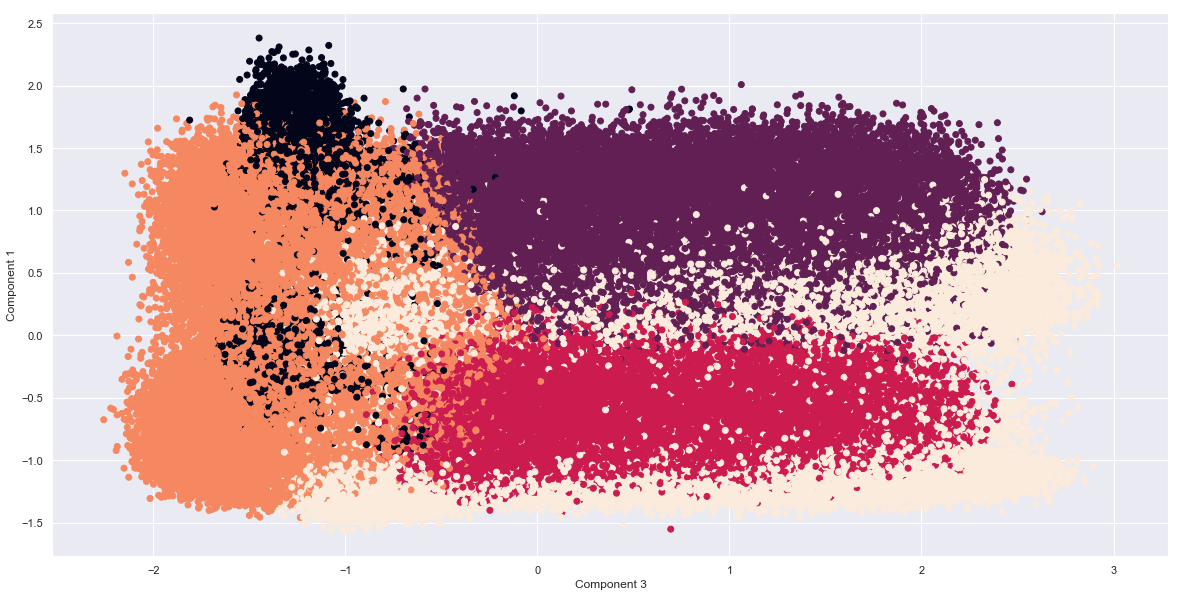

In [28]:
plt.figure(figsize=[20, 10])
plt.scatter(principalDf3.c1, principalDf3.c3, c = pred5)
plt.ylabel('Component 1')
plt.xlabel('Component 3')
plt.plot()


In [29]:
# Init dataframe
data_five_clusters = pd.DataFrame(data=x_train, columns=x_train.columns)

In [30]:
# Assign clusters to clients
data_five_clusters['CLUSTER'] = pred5

In [31]:
data_five_clusters.head()

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,AMT_PAYMENT_y,SK_ID_PREV_y.2,SK_ID_PREV_y.3,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,CLUSTER
0,0.088736,0.090287,0.077441,0.082859,0.0,0.0,0.000000,0.000,0.0,0.047619,...,0.015746,0.021057,0.021057,0.333333,0.0,0.807468,0.881253,0.040342,0.040342,3
1,0.131689,0.311736,0.271605,0.114485,0.0,0.0,0.000000,0.000,0.0,0.000000,...,0.166327,0.699810,0.439672,0.333333,0.0,0.209661,0.528060,0.029053,0.029053,1
2,0.108209,0.066837,0.063973,0.051233,0.0,0.0,0.000000,0.000,0.0,0.000000,...,0.205163,0.660404,0.584794,0.333333,0.0,0.814320,0.883693,0.010827,0.010827,2
3,0.099738,0.111235,0.103255,0.034366,0.0,0.0,0.000000,0.125,0.0,0.047619,...,0.128183,0.560971,0.101379,0.333333,0.0,0.147653,0.488410,0.034899,0.000991,2
4,0.153570,0.378458,0.337823,0.068100,0.0,0.0,0.037037,0.125,0.0,0.095238,...,0.005143,0.344768,0.061136,0.333333,0.0,0.004796,0.408093,0.026840,0.026840,3


In [32]:
# Filter clients clusters
five_cluster_1 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 0]
five_cluster_2 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 1]
five_cluster_3 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 2]
five_cluster_4 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 3]
five_cluster_5 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 4]

five_clusters = [five_cluster_1, five_cluster_2, five_cluster_3, five_cluster_4, five_cluster_5]

# Рапределение количества клиентов по кластерам
### KMeans clustering смог разбить клинтов на 5 кластеров таким образом, что кластера 2 и 3 имеют почти одинаковое количество клиентов, чуть меньше имеет кластер 5 и совсем немного в кластере 1. Кластер 4 имеет больше всего клиентов.

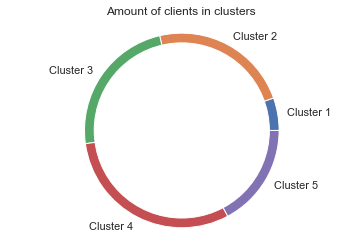

In [33]:
names='Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5',
size= [five_clusters[0].shape[0], five_clusters[1].shape[0], five_clusters[2].shape[0], 
       five_clusters[3].shape[0], five_clusters[4].shape[0]]

fig1, ax1 = plt.subplots()
my_circle=plt.Circle( (0,0), 0.9, color='white')
ax1.pie(size, labels=names) # colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
ax1.axis('equal')  
plt.title('Amount of clients in clusters')
plt.show()


### Short statisitcal view

In [34]:
d1 = five_clusters[0].describe()
d1

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,AMT_PAYMENT_y,SK_ID_PREV_y.2,SK_ID_PREV_y.3,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,CLUSTER
count,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,...,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.0
mean,0.105251,0.171667,0.156355,0.078780,0.002906,0.003346,0.006079,0.010325,0.001567,0.013117,...,0.012873,0.258368,0.040655,0.321005,0.017823,0.003032,0.408122,0.001804,0.001550,0.0
std,0.078149,0.133775,0.125699,0.067496,0.043921,0.042874,0.030940,0.048742,0.022072,0.036737,...,0.004043,0.108628,0.155775,0.065202,0.083711,0.034732,0.020529,0.008126,0.007543,0.0
min,0.003497,0.000000,0.001122,0.000633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000203,0.000000,0.000000,0.000000,0.000000,0.388776,0.000000,0.000000,0.0
25%,0.052721,0.067416,0.057239,0.040692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013346,0.238209,0.000000,0.333333,0.000000,0.001028,0.407076,0.000294,0.000294,0.0
50%,0.086065,0.134831,0.113356,0.061775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013346,0.238209,0.000000,0.333333,0.000000,0.001028,0.407076,0.000294,0.000294,0.0
75%,0.134660,0.228751,0.214366,0.093401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013346,0.238209,0.000000,0.333333,0.000000,0.001028,0.407076,0.000294,0.000294,0.0
max,1.000000,1.000000,1.000000,0.831330,1.000000,1.000000,0.592593,1.000000,0.800000,0.428571,...,0.085944,0.998917,0.998917,0.666667,1.000000,0.996232,0.997763,0.267840,0.267840,0.0


In [35]:
d2 = five_clusters[1].describe()
d2

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,AMT_PAYMENT_y,SK_ID_PREV_y.2,SK_ID_PREV_y.3,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,CLUSTER
count,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,...,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.0
mean,0.104970,0.146271,0.130915,0.076598,0.002462,0.002739,0.012220,0.037391,0.006607,0.112128,...,0.063363,0.489798,0.261199,0.216751,0.000532,0.406402,0.645377,0.026005,0.017995,1.0
std,0.057228,0.100547,0.092262,0.046051,0.036437,0.037731,0.041577,0.083945,0.037075,0.093313,...,0.090735,0.210036,0.233362,0.159766,0.015337,0.305989,0.181388,0.038718,0.036221,0.0
min,0.000808,0.000000,0.001122,0.000633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.063674,0.063613,0.057239,0.047017,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,...,0.007736,0.336411,0.077831,0.000000,0.000000,0.115108,0.472753,0.000523,0.000075,1.0
50%,0.095924,0.123596,0.103255,0.065992,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,...,0.023645,0.488384,0.192288,0.333333,0.000000,0.386434,0.633184,0.016335,0.001044,1.0
75%,0.134660,0.202247,0.169473,0.093401,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.079007,0.640791,0.379315,0.333333,0.000000,0.694416,0.816185,0.034967,0.023856,1.0
max,0.838169,1.000000,1.000000,0.873498,1.000000,1.000000,1.000000,1.000000,0.800000,0.809524,...,1.000000,0.999906,0.999906,0.666667,0.880000,1.000000,1.000000,0.981097,0.981097,1.0


In [36]:
d3 = five_clusters[2].describe()
d3

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,AMT_PAYMENT_y,SK_ID_PREV_y.2,SK_ID_PREV_y.3,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,CLUSTER
count,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,...,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.000000,49324.0
mean,0.097322,0.133863,0.118927,0.065922,0.002301,0.002555,0.007944,0.036372,0.006253,0.110517,...,0.056202,0.489451,0.266120,0.221001,0.000447,0.436365,0.663107,0.024436,0.016526,2.0
std,0.051956,0.092140,0.083798,0.040375,0.035451,0.036212,0.027505,0.081881,0.036400,0.093710,...,0.083501,0.209471,0.234210,0.158489,0.013054,0.306088,0.181434,0.034846,0.032572,0.0
min,0.001230,0.000000,0.000000,0.000633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000259,0.000139,0.000000,0.000000,0.000000,0.000000,0.379626,0.000000,0.000000,2.0
25%,0.059105,0.059049,0.049383,0.040692,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,...,0.006191,0.338167,0.082539,0.000000,0.000000,0.140802,0.487800,0.000569,0.000076,2.0
50%,0.090687,0.115955,0.102132,0.061354,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,...,0.018812,0.487607,0.196700,0.333333,0.000000,0.444673,0.667751,0.015947,0.001090,2.0
75%,0.125345,0.187640,0.158249,0.082859,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.068647,0.638453,0.393102,0.333333,0.000000,0.724906,0.834079,0.033188,0.022633,2.0
max,0.824777,0.661798,0.552189,0.936749,1.000000,1.000000,0.629630,1.000000,1.000000,1.000000,...,0.917620,0.999900,0.999900,1.000000,0.960000,0.998972,0.999390,1.000000,1.000000,2.0


In [37]:
d4 = five_clusters[3].describe()
d4

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,AMT_PAYMENT_y,SK_ID_PREV_y.2,SK_ID_PREV_y.3,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,CLUSTER
count,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,...,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.000000,64283.0
mean,0.098875,0.136888,0.123491,0.065201,0.002403,0.002932,0.007655,0.017160,0.005202,0.032474,...,0.012179,0.490615,0.368988,0.325431,0.000353,0.524271,0.715027,0.035515,0.028326,3.0
std,0.056523,0.100248,0.091302,0.042744,0.037288,0.039481,0.028442,0.049855,0.033173,0.044821,...,0.027185,0.244620,0.276851,0.056393,0.011417,0.308935,0.183055,0.037438,0.038993,0.0
min,0.000808,0.000000,0.001122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000009,0.000002,0.000000,0.000000,0.000000,0.000000,0.358072,0.000000,0.000000,3.0
25%,0.055889,0.056180,0.049383,0.040692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002808,0.305422,0.129981,0.333333,0.000000,0.228845,0.539447,0.016326,0.002107,3.0
50%,0.092005,0.113966,0.102132,0.051233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005151,0.487990,0.306500,0.333333,0.000000,0.584104,0.750102,0.026233,0.019884,3.0
75%,0.130740,0.190674,0.159371,0.082859,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,...,0.011724,0.672587,0.574035,0.333333,0.000000,0.810209,0.884709,0.043463,0.038369,3.0
max,0.871017,0.976598,0.943883,1.000000,1.000000,1.000000,0.703704,0.875000,0.800000,0.428571,...,0.678823,1.000000,1.000000,1.000000,0.840000,1.000000,0.999187,0.993105,0.993105,3.0


In [38]:
d5 = five_clusters[4].describe()
d5

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,AMT_PAYMENT_y,SK_ID_PREV_y.2,SK_ID_PREV_y.3,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,CLUSTER
count,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,...,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.000000,36010.0
mean,0.085581,0.124228,0.111437,0.051841,0.002708,0.002180,0.006531,0.032744,0.006048,0.090697,...,0.040095,0.489766,0.295937,0.278950,0.000846,0.440201,0.665278,0.030006,0.022396,4.0
std,0.050913,0.094246,0.085972,0.034483,0.038540,0.033569,0.025908,0.076978,0.035836,0.097276,...,0.069881,0.219819,0.255694,0.124688,0.018226,0.314632,0.186407,0.034321,0.034885,0.0
min,0.000000,0.000000,0.001122,0.000211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000017,0.000036,0.000000,0.000000,0.000000,0.000000,0.379829,0.000000,0.000000,4.0
25%,0.049351,0.052360,0.046016,0.030150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004232,0.331428,0.087511,0.333333,0.000000,0.137033,0.485563,0.010258,0.000229,4.0
50%,0.077330,0.102247,0.102132,0.042800,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,...,0.010676,0.489529,0.216440,0.333333,0.000000,0.443645,0.667039,0.022377,0.012140,4.0
75%,0.109264,0.177326,0.158249,0.065992,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.041223,0.645158,0.448589,0.333333,0.000000,0.736554,0.840992,0.040251,0.032964,4.0
max,0.797466,0.661798,0.551066,0.725912,1.000000,1.000000,0.592593,0.750000,0.800000,0.952381,...,0.751394,0.999994,0.999994,1.000000,1.000000,0.997945,0.997357,0.941585,0.941585,4.0


# Уровень материального состояния клиентов по кластерам
### Можно видеть, что все кластера, кроме 5, имеют примерно одинаковый средний уровень дохода, но кластер  1 имеет выше всего, а кластер 5 - ниже всех. Так же, стоит заметить, что уровень отклонения от среднего во всех кластерах примерно одинаковый, кроме кластера 1, где заметно выше отклонение от среднего. Помимо этого, этот кластер, в отличии от других, имеет более выраженую тенденцию к выбросам в направлении высоких доходов.

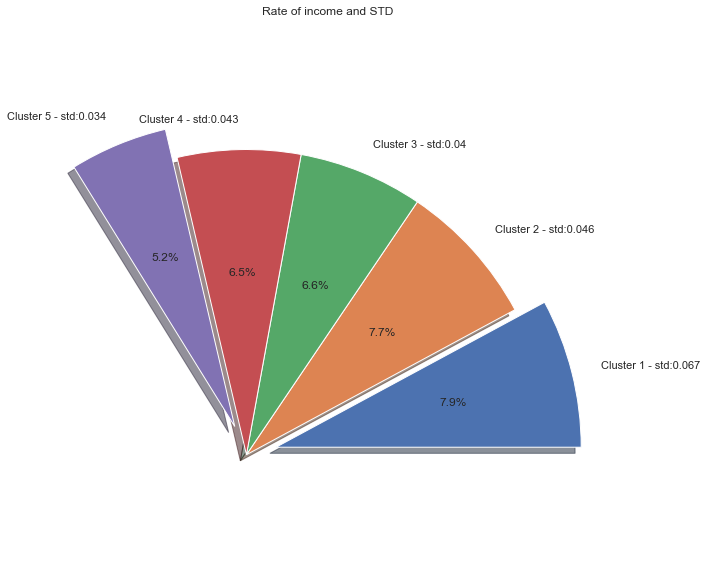

In [62]:
sizes = [d1.loc['mean']['AMT_INCOME_TOTAL'], d2.loc['mean']['AMT_INCOME_TOTAL'],
         d3.loc['mean']['AMT_INCOME_TOTAL'], d4.loc['mean']['AMT_INCOME_TOTAL'],
         d5.loc['mean']['AMT_INCOME_TOTAL']]
explode = (0.1, 0, 0, 0, 0.1)  
labels = ['Cluster 1 - std:{}'.format(round(d1.loc['std']['AMT_INCOME_TOTAL'], 3)),
          'Cluster 2 - std:{}'.format(round(d2.loc['std']['AMT_INCOME_TOTAL'], 3)),
          'Cluster 3 - std:{}'.format(round(d3.loc['std']['AMT_INCOME_TOTAL'], 3)),
          'Cluster 4 - std:{}'.format(round(d4.loc['std']['AMT_INCOME_TOTAL'], 3)),
          'Cluster 5 - std:{}'.format(round(d5.loc['std']['AMT_INCOME_TOTAL'], 3))]
 
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('Rate of income and STD')
plt.show()

### Рейтинг региона проживания имеет уровни - 1, 2, 3. Где 1 это высокий уровень, а 3 - низкий. Следовательно можно видеть, что кластера 1 и 2 имеют меньшее соотношение, а значит клиенты этих кластеров проживают в регионах с высоким рейтингом, а на графике выше эти кластера представляют клиентов с выскоким уровнем доходов. Кластера 3, 4 и 5 имеют выше соотношение, а значит кленты этих кластеров проживают в неблагоприятных регионах, и они , судя по графику выше, имеют ниже уровень доходов.

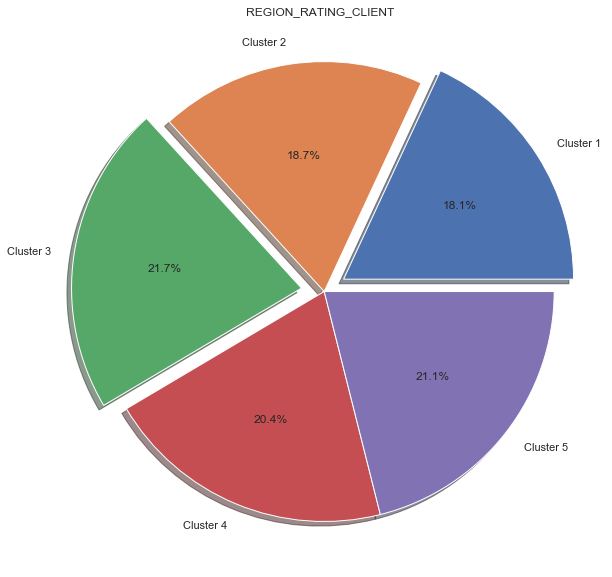

In [63]:
sizes = [d1.loc['mean']['REGION_RATING_CLIENT'], d2.loc['mean']['REGION_RATING_CLIENT'],
         d3.loc['mean']['REGION_RATING_CLIENT'], d4.loc['mean']['REGION_RATING_CLIENT'],
         d5.loc['mean']['REGION_RATING_CLIENT']]
explode = (0.1, 0, 0.1, 0, 0)  

plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('REGION_RATING_CLIENT')
plt.show()

# Социальный анализ

###  Можно видеть, что кластер 1, который имеет условно богатых клиентов - имеет меньше детей. А кластер 5 - почти не имеет и являеться самым бедным из всех кластеров.

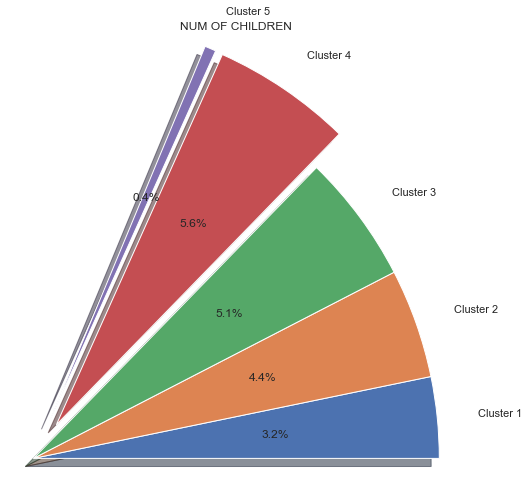

In [64]:
sizes = [d1.loc['mean']['CNT_CHILDREN'], d2.loc['mean']['CNT_CHILDREN'],
         d3.loc['mean']['CNT_CHILDREN'], d4.loc['mean']['CNT_CHILDREN'],
         d5.loc['mean']['CNT_CHILDREN']]
explode = (0, 0, 0, 0.1, 0.1)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal') 
plt.title('NUM OF CHILDREN')
plt.show()

### Больше всего имеет внимание кластер 5, это клиенты с высоким возрастом, что предположительно делает их ближе всего к категории "пенсионеры" или же просто "люди приклонного возраста"

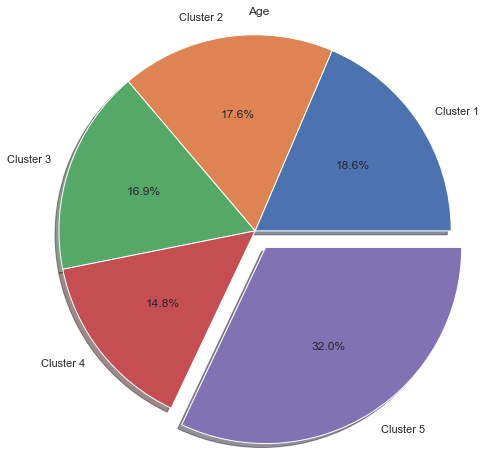

In [58]:
sizes = [d1.loc['mean']['DAYS_BIRTH'], d2.loc['mean']['DAYS_BIRTH'],
         d3.loc['mean']['DAYS_BIRTH'], d4.loc['mean']['DAYS_BIRTH'],
         d5.loc['mean']['DAYS_BIRTH']]
explode = (0, 0, 0, 0, 0.1)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('Age')
plt.show()

### График ниже полностью подтверждает утверждение выше

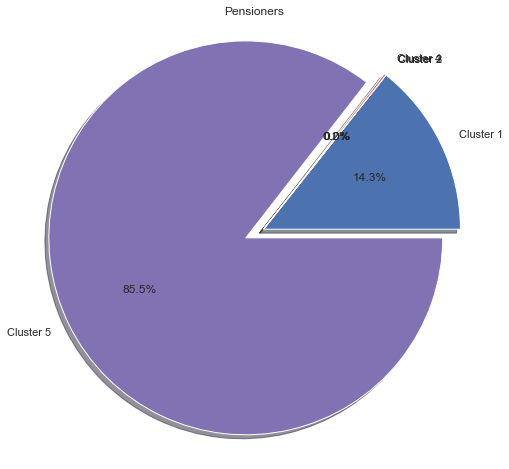

In [59]:
sizes = [d1.loc['mean']['NAME_INCOME_TYPE_Pensioner'], d2.loc['mean']['NAME_INCOME_TYPE_Pensioner'],
         d3.loc['mean']['NAME_INCOME_TYPE_Pensioner'], d4.loc['mean']['NAME_INCOME_TYPE_Pensioner'],
         d5.loc['mean']['NAME_INCOME_TYPE_Pensioner']]
explode = (0, 0, 0, 0, 0.1)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('Pensioners')
plt.show()

### Задолженость по кредиту выше всего у кластера 1, в то время как ниже у кластера 5.

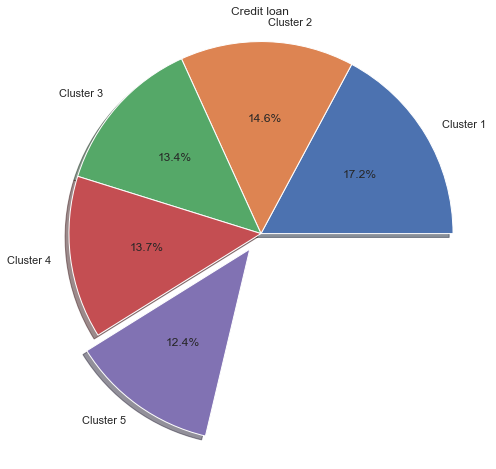

In [60]:
sizes = [d1.loc['mean']['AMT_CREDIT_x'], d2.loc['mean']['AMT_CREDIT_x'],
         d3.loc['mean']['AMT_CREDIT_x'], d4.loc['mean']['AMT_CREDIT_x'],
         d5.loc['mean']['AMT_CREDIT_x']]
explode = (0, 0, 0, 0, 0.1)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('Credit loan')
plt.show()

### Стоимость товаров на которые были потрачены кредитные средства выше у кластера 1 и ниже всего у кластера 5. Что говорит о том, что клиенты в кластере 1 имеют, как выше займы, так и выше уровень доходов , но и стоимость предметов потребления этими клентами выше - стоить предпологать что кластер 1 - это бизнессмены или очень хорошо обеспеченые люди.

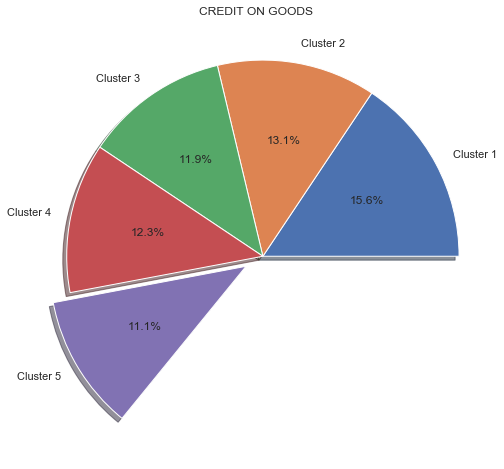

In [45]:
sizes = [d1.loc['mean']['AMT_GOODS_PRICE_x'], d2.loc['mean']['AMT_GOODS_PRICE_x'],
         d3.loc['mean']['AMT_GOODS_PRICE_x'], d4.loc['mean']['AMT_GOODS_PRICE_x'],
         d5.loc['mean']['AMT_GOODS_PRICE_x']]
explode = (0, 0, 0, 0, 0.1)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('CREDIT ON GOODS')
plt.show()

### Пол клиентов

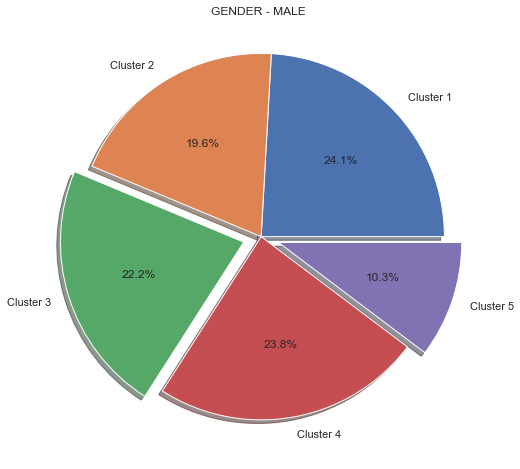

In [46]:
sizes = [d1.loc['mean']['CODE_GENDER_M'], d2.loc['mean']['CODE_GENDER_M'],
         d3.loc['mean']['CODE_GENDER_M'], d4.loc['mean']['CODE_GENDER_M'],
         d5.loc['mean']['CODE_GENDER_M']]
explode = (0, 0, 0.1, 0, 0.1)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('GENDER - MALE')
plt.show()

### График показывает, что кластер 1 имеет все основания для того, что бы к нему можно было отнести состоятельных людей

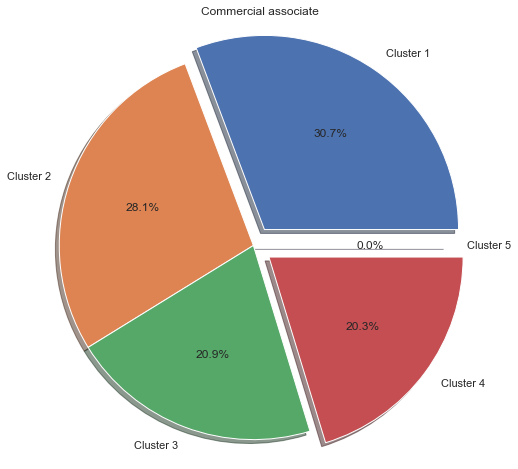

In [65]:
sizes = [d1.loc['mean']['NAME_INCOME_TYPE_Commercial associate'], d2.loc['mean']['NAME_INCOME_TYPE_Commercial associate'],
         d3.loc['mean']['NAME_INCOME_TYPE_Commercial associate'], d4.loc['mean']['NAME_INCOME_TYPE_Commercial associate'],
         d5.loc['mean']['NAME_INCOME_TYPE_Commercial associate']]
explode = (0.1, 0, 0, 0.1, 0)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('Commercial associate')
plt.show()

### Уоровень образования указывает на то, что наиболее состоятельные люди имеют высшее образование (кластер 1), в то время, как кластер 5 - это пенсионеры, которые в силу возраста и времени рождения имеют уровень образования очевидно ниже. Но особенного внимания привлекает кластер 3, который в сумме с  другими факторами говорит о том, что это клиенты класса ниже среднего или даже низкого.

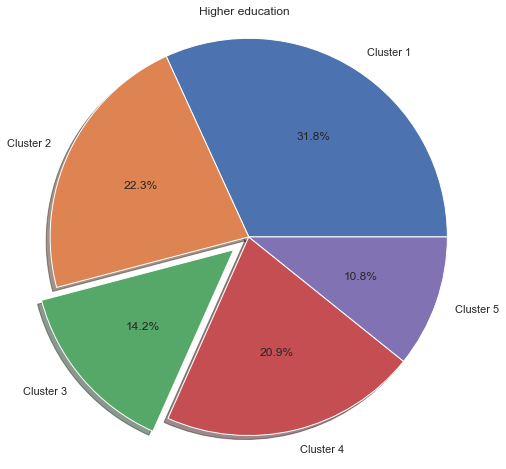

In [48]:
sizes = [d1.loc['mean']['NAME_EDUCATION_TYPE_Higher education'], d2.loc['mean']['NAME_EDUCATION_TYPE_Higher education'],
         d3.loc['mean']['NAME_EDUCATION_TYPE_Higher education'], d4.loc['mean']['NAME_EDUCATION_TYPE_Higher education'],
         d5.loc['mean']['NAME_EDUCATION_TYPE_Higher education']]
explode = (0, 0, 0.1, 0, 0)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('Higher education')
plt.show()

# Проблемы с возвратом кредита по кластерам

In [69]:
lbl = x_train.copy()

In [71]:
lbl['CLUSTER'] = pred5

In [78]:
data_five_clusters['TARGET'] = x_train_labels['TARGET'].values
five_cluster_1 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 0]
five_cluster_2 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 1]
five_cluster_3 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 2]
five_cluster_4 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 3]
five_cluster_5 = data_five_clusters.loc[data_five_clusters['CLUSTER'] == 4]

five_clusters = [five_cluster_1, five_cluster_2, five_cluster_3, five_cluster_4, five_cluster_5]

In [93]:
five_cluster_1['TARGET'].sum() / five_cluster_4['TARGET'].count()


0.01095157351088157

### График показывает, что кластер 3 имеет больше всего проблем с возвратом кредитов, а это клиенты низкого материального уровня. Меньше всего проблем с клиентами пожилого возраста и в кластером 1.

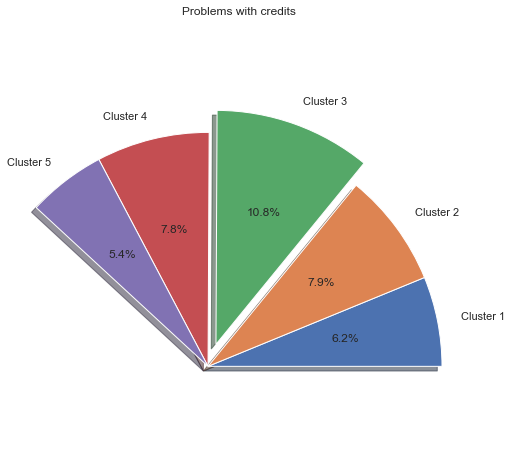

In [115]:
sizes = [five_cluster_1['TARGET'].sum() / five_cluster_1['TARGET'].count(), 
         five_cluster_2['TARGET'].sum() / five_cluster_2['TARGET'].count(),
         five_cluster_3['TARGET'].sum() / five_cluster_3['TARGET'].count(), 
         five_cluster_4['TARGET'].sum() / five_cluster_4['TARGET'].count(),
         five_cluster_5['TARGET'].sum() / five_cluster_5['TARGET'].count()]
explode = (0, 0, 0.1, 0, 0)  

plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('Problems with credits')
plt.show()

# Выводы

## Из анализа выше следует отметить:

## 1) Кластер 1 - это клиенты класса выше среднего, образованые, состоятельные, не молодые и с большими апетитами на кредиты. Доля проблем с возвратом кредита относительно низкая.

## 2) Кластер 2 - это клиенты среднего класса, среднего возраста, с высшим образованием. Уровень проблем с возвратом кредита - средний.

## 3) Кластер 3 - это клиенты слабого образования, низкими доходами. Уровень проблем с возвратом кредита - очень высокий.

## 4) Кластер 4 - это клиенты класса ниже среднего, но молодого возраста, возможно начинающие работники, поэтому и не сильно состоятельные. Уровень проблем с возвратом кредита - средний.

## 5) Кластер 5 - это клиенты приклонного возраста, с очень низкими доходами, одиноки и слабообразованые. Уровень проблем с возвратом кредита -  очень низкий.

# 2)  Clients clustering - 10 clusters

In [95]:
kmeansmodel_10 = KMeans(n_clusters=10, init='k-means++', random_state=0)
pred10 = kmeansmodel_10.fit_predict(train)

In [96]:
### PCA decomposiotion
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(train)
principalDf3 = pd.DataFrame(data = principalComponents, columns = ['c1', 'c2', 'c3'])
principalDf3.head()

,c1,c2,c3
0,-1.165983,-0.081691,1.063115
1,-0.051385,0.378113,0.970991
2,1.327426,-0.552214,-0.664795
3,-0.156237,-0.374372,-0.829915
4,-1.165797,-0.098944,-0.154447


[]

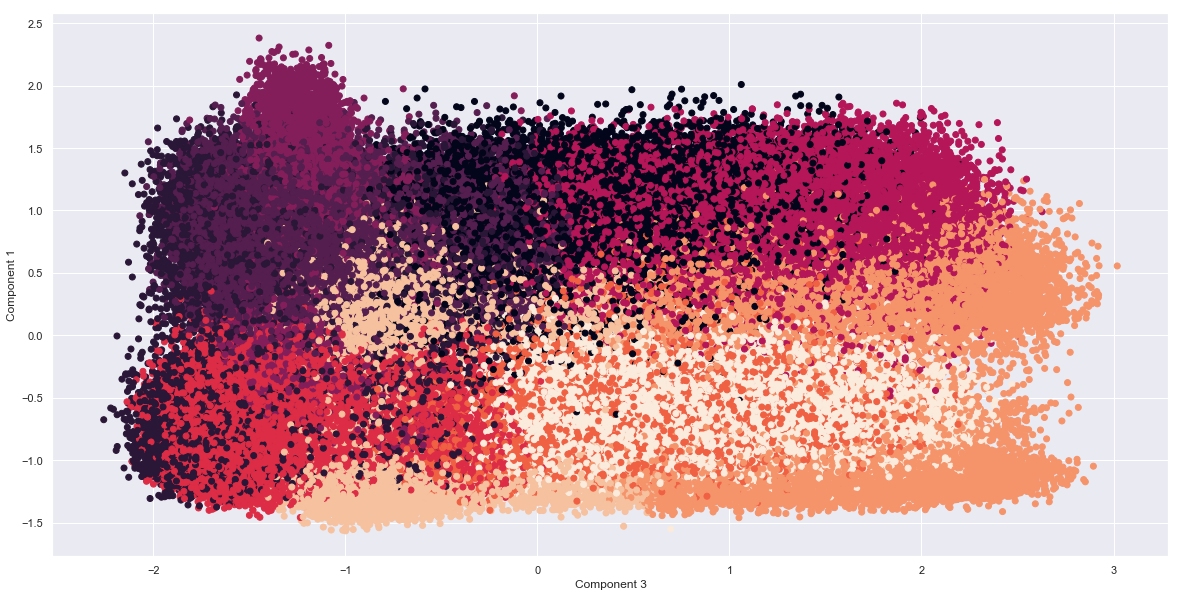

In [97]:
plt.figure(figsize=[20, 10])
plt.scatter(principalDf3.c1, principalDf3.c3, c = pred10)
plt.ylabel('Component 1')
plt.xlabel('Component 3')
plt.plot()

In [109]:
# Init dataframe
data_ten_clusters = pd.DataFrame(data=x_train, columns=x_train.columns)

In [110]:
# Assign clusters to clients
data_ten_clusters['CLUSTER'] = pred10
data_ten_clusters['TARGET'] = x_train_labels['TARGET'].values

In [111]:
data_ten_clusters.head()

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,SK_ID_PREV_y.2,SK_ID_PREV_y.3,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,CLUSTER,TARGET
0,0.088736,0.090287,0.077441,0.082859,0.0,0.0,0.000000,0.000,0.0,0.047619,...,0.021057,0.021057,0.333333,0.0,0.807468,0.881253,0.040342,0.040342,2,1.0
1,0.131689,0.311736,0.271605,0.114485,0.0,0.0,0.000000,0.000,0.0,0.000000,...,0.699810,0.439672,0.333333,0.0,0.209661,0.528060,0.029053,0.029053,2,0.0
2,0.108209,0.066837,0.063973,0.051233,0.0,0.0,0.000000,0.000,0.0,0.000000,...,0.660404,0.584794,0.333333,0.0,0.814320,0.883693,0.010827,0.010827,9,0.0
3,0.099738,0.111235,0.103255,0.034366,0.0,0.0,0.000000,0.125,0.0,0.047619,...,0.560971,0.101379,0.333333,0.0,0.147653,0.488410,0.034899,0.000991,6,0.0
4,0.153570,0.378458,0.337823,0.068100,0.0,0.0,0.037037,0.125,0.0,0.095238,...,0.344768,0.061136,0.333333,0.0,0.004796,0.408093,0.026840,0.026840,1,0.0


In [112]:
# Filter clients clusters
ten_cluster_1 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 0]
ten_cluster_2 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 1]
ten_cluster_3 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 2]
ten_cluster_4 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 3]
ten_cluster_5 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 4]
ten_cluster_6 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 5]
ten_cluster_7 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 6]
ten_cluster_8 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 7]
ten_cluster_9 = data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 8]
ten_cluster_10= data_ten_clusters.loc[data_ten_clusters['CLUSTER'] == 9]

ten_clusters = [ten_cluster_1, ten_cluster_2, ten_cluster_3, ten_cluster_4, ten_cluster_5,
                ten_cluster_6, ten_cluster_7, ten_cluster_8, ten_cluster_9, ten_cluster_10]

# Рапределение количества клиентов по кластерам

### KMeans clustering смог разбить клиентов на 10 кластеров таким образом, что кластер 6 имеет больше всего клиентов, а кластер 4 - меньше всего. В остальных случаях обьемы кластеров примерно одинаковые

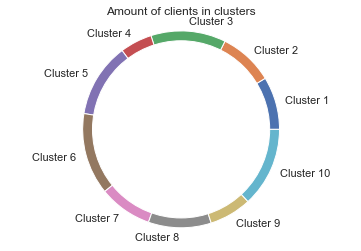

In [118]:
names=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5',
       'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10']

size = []
for c in ten_clusters:
    size.append(c.shape[0])

fig1, ax1 = plt.subplots()
my_circle=plt.Circle( (0,0), 0.9, color='white')
ax1.pie(size, labels=names) # colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
ax1.axis('equal')  
plt.title('Amount of clients in clusters')
plt.show()

In [123]:
ten = []
for c in ten_clusters:
    ten.append(c.describe()) 

In [124]:
ten[0]

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,SK_ID_PREV_y.2,SK_ID_PREV_y.3,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,CLUSTER,TARGET
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.0,18207.000000
mean,0.100400,0.140169,0.124689,0.072181,0.002224,0.002719,0.010814,0.032687,0.006942,0.094767,...,0.487210,0.267714,0.145896,0.000488,0.462459,0.678626,0.015593,0.011898,0.0,0.092492
std,0.053072,0.094821,0.086785,0.043289,0.033687,0.037142,0.036747,0.077365,0.037734,0.080734,...,0.216183,0.235325,0.165814,0.014665,0.318417,0.188802,0.030010,0.028477,0.0,0.289727
min,0.003128,0.000000,0.001122,0.002741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000233,0.000000,0.000000,0.000000,0.000000,0.386743,0.000000,0.000000,0.0,0.000000
25%,0.062567,0.063299,0.052750,0.040692,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,...,0.323309,0.082655,0.000000,0.000000,0.144056,0.489833,0.000171,0.000052,0.0,0.000000
50%,0.093692,0.120222,0.103255,0.061775,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,...,0.485045,0.199828,0.000000,0.000000,0.483385,0.690728,0.001365,0.000432,0.0,0.000000
75%,0.128614,0.191011,0.159371,0.093401,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.645555,0.392930,0.333333,0.000000,0.770127,0.861122,0.022708,0.014623,0.0,0.000000
max,0.670170,1.000000,1.000000,0.873498,1.000000,1.000000,1.000000,1.000000,0.800000,0.761905,...,0.999888,0.999888,0.666667,0.920000,1.000000,1.000000,0.981097,0.981097,0.0,1.000000


# Уровень материального состояния клиентов по кластерам

### Кластеры: 9, 8, 6 - имеют низкий уровень доходов; 
### Кластеры: 10, 3, 1 - иимеют средний уровень доходов;
### Кластеры: 2, 4, 5, 7 - имеют высокий уровень доходов.

['Cluster 1 - std:0.043', 'Cluster 2 - std:0.048', 'Cluster 3 - std:0.042', 'Cluster 4 - std:0.068', 'Cluster 5 - std:0.048', 'Cluster 6 - std:0.035', 'Cluster 7 - std:0.043', 'Cluster 8 - std:0.035', 'Cluster 9 - std:0.033', 'Cluster 10 - std:0.038']


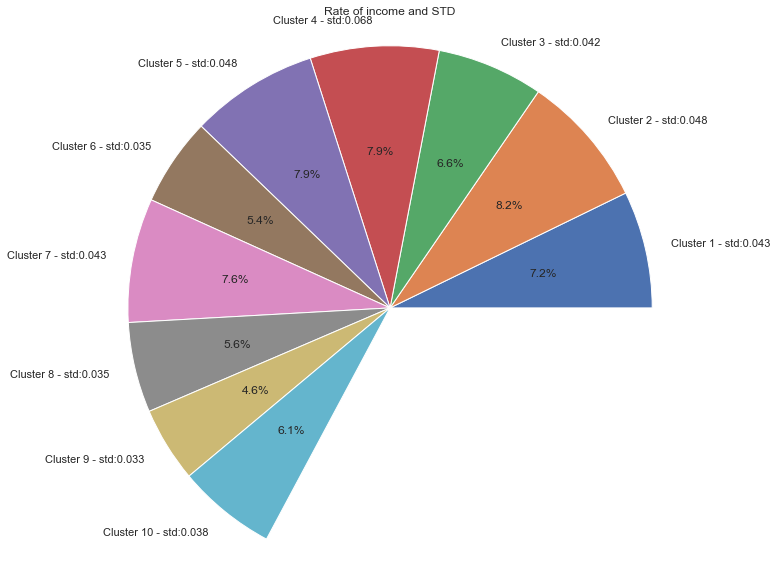

In [141]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['AMT_INCOME_TOTAL'])
    names.append('Cluster {n} - std:{s}'.format(n=n + 1 , s=round(c.loc['std']['AMT_INCOME_TOTAL'], 3)))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Rate of income and STD')
plt.show()

### Рейтинг региона проживания имеет уровни - 1, 2, 3. Где 1 это высокий уровень, а 3 - низкий.
### Кластеры: 6, 10, 9, 7 - клиенты этих кластеров живут в неблагополучных районах
### Кластеры: 2, 8 - клиенты живут в районах средней благополучности
### Кластеры: 1, 4, 5, 3 - кленты живут в благополучных районах

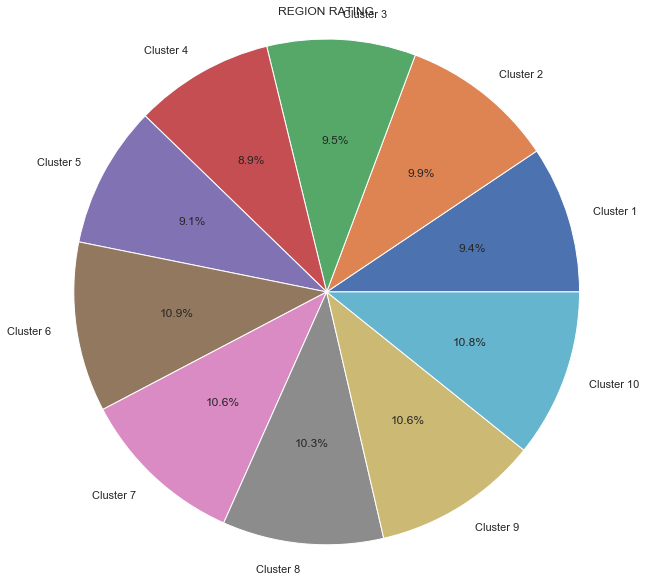

In [144]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['REGION_RATING_CLIENT'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('REGION RATING')
plt.show()

# Социальный анализ
### Кластеры: 9, 8, 4, 5 - имеют мало детей
### Кластеры: 10, 3, 1, 7 -  имеют не много детей
### Кластеры: 2, 6 - имеют много детей

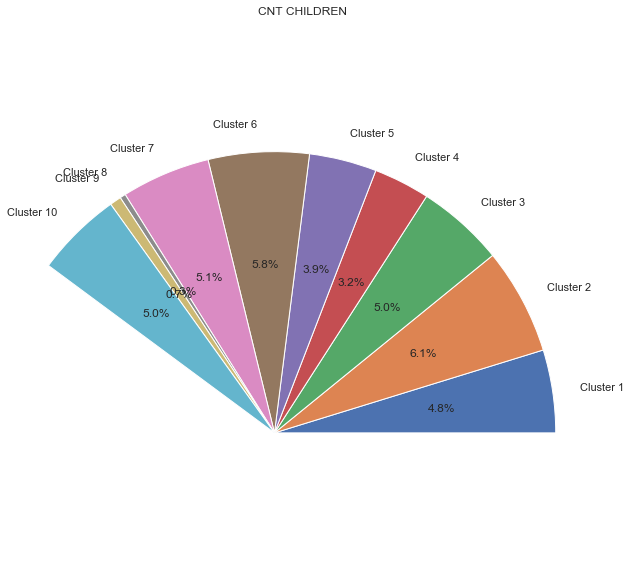

In [146]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['CNT_CHILDREN'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('CNT CHILDREN')
plt.show()

### Кластеры: 1, 6, 3, 2 - молодые клиенты
### Кластеры: 5, 4, 10, 7 - клиенты среднего возраста
### Кластеры: 9, 8 - клиенты пожилого возраста

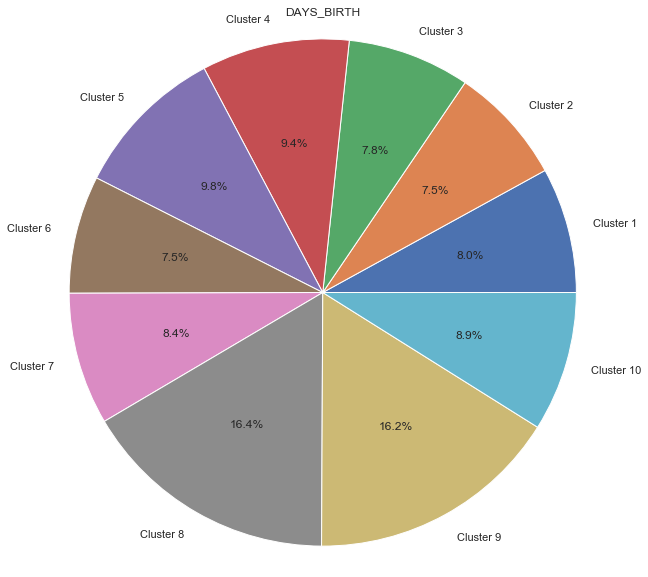

In [150]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['DAYS_BIRTH'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('DAYS_BIRTH')
plt.show()

### Кластеры: 8, 9  - это пенсионеры
### Кластер: 4 - это очень малая доля пенсионеров

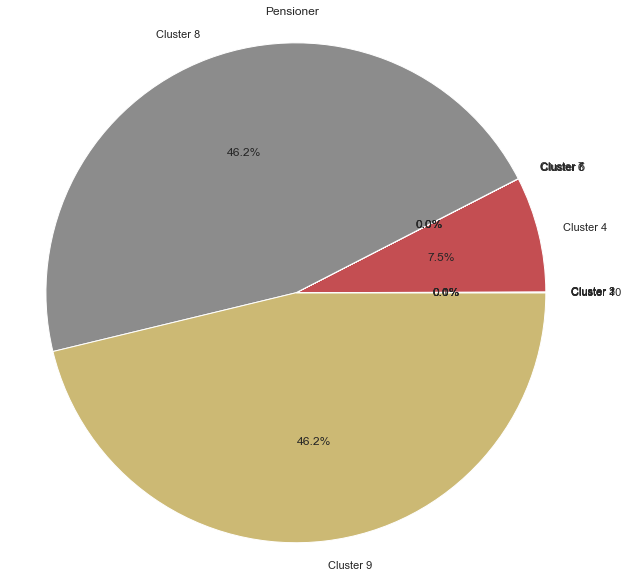

In [151]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['NAME_INCOME_TYPE_Pensioner'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Pensioner')
plt.show()

### Кластеры: 8, 9, 6 - потратили мало кредитных средств на товары
### Кластер: 4 - кленты потратили много на товары

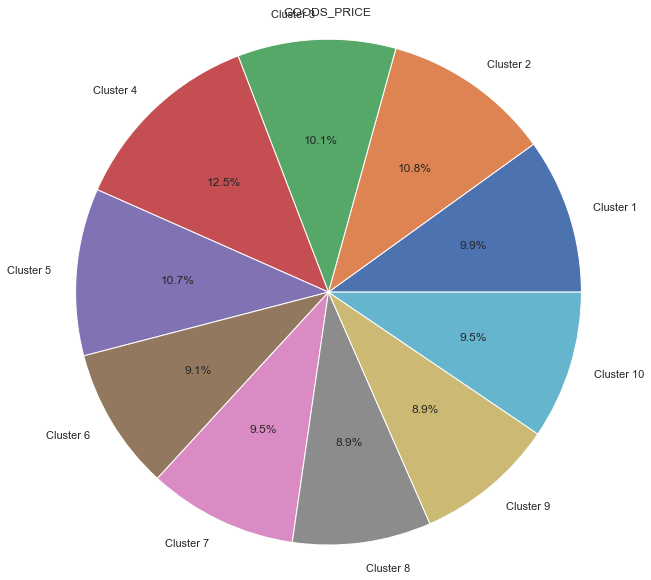

In [152]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['AMT_GOODS_PRICE_x'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('GOODS_PRICE')
plt.show()

### Кластеры: 2, 7 - много клиентов мужского пола

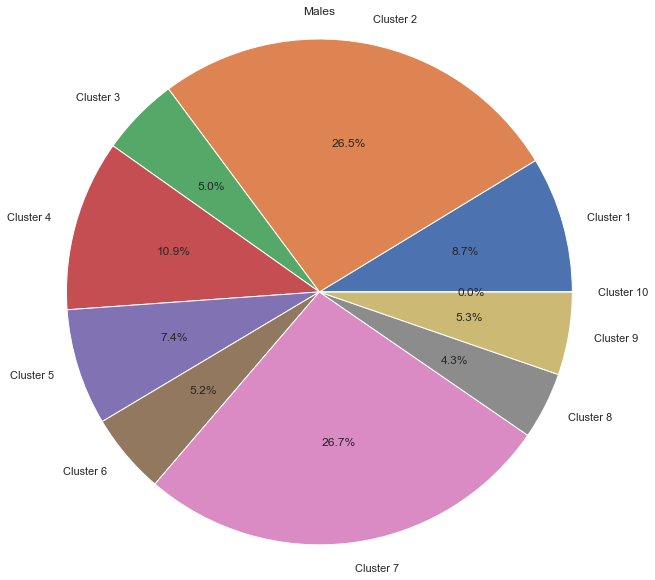

In [153]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['CODE_GENDER_M'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Males')
plt.show()

### Кластеры: 2, 7 - очень мало клентов женского пола

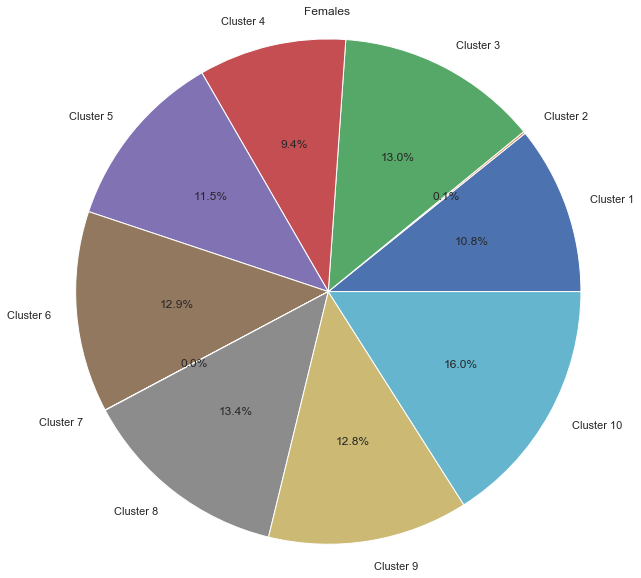

In [154]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['CODE_GENDER_F'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Females')
plt.show()

### Кластеры: 8, 9 - почти не связаны с комерцией
### Кластеры: 4, 5 - сильно связаны с комерцией

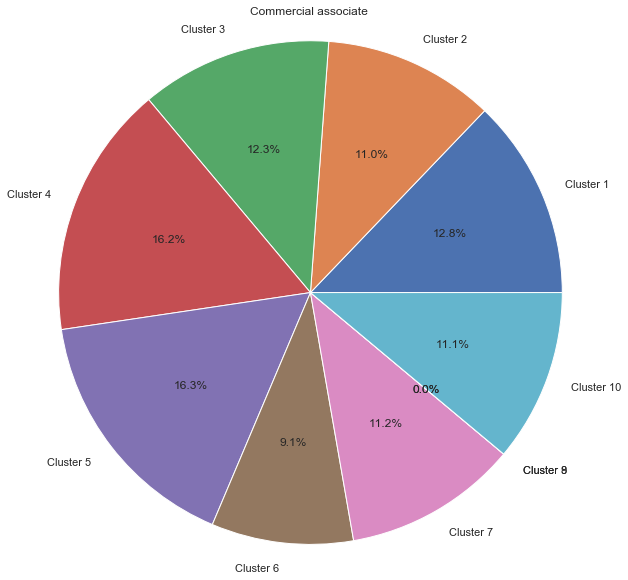

In [156]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['NAME_INCOME_TYPE_Commercial associate'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Commercial associate')
plt.show()

### Кластеры: 9, 8, 7 - мало клиентов с высшим образованием
### Кластеры: 4, 3, 12 - много клиентов с высшим образованием

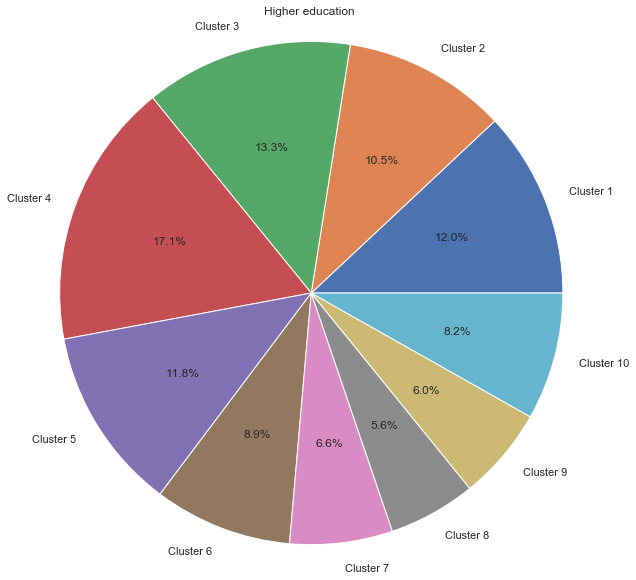

In [157]:
explode = [0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0]  
 
sizes = []
names = []
n = 0
for c in ten:
    sizes.append(c.loc['mean']['NAME_EDUCATION_TYPE_Higher education'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Higher education')
plt.show()

### Calculate differences between clusters 8 and 9

In [254]:
np.where(((abs(abs(ten[7].loc['mean'].values) - abs(ten[8].loc['mean'].values)) / 100) > 0.005) == True)

(array([ 71, 296, 297, 332, 333, 389, 393, 403, 416, 471], dtype=int64),)

In [267]:
ten_clusters[7].columns.values[393]

'NAME_PORTFOLIO_POS'

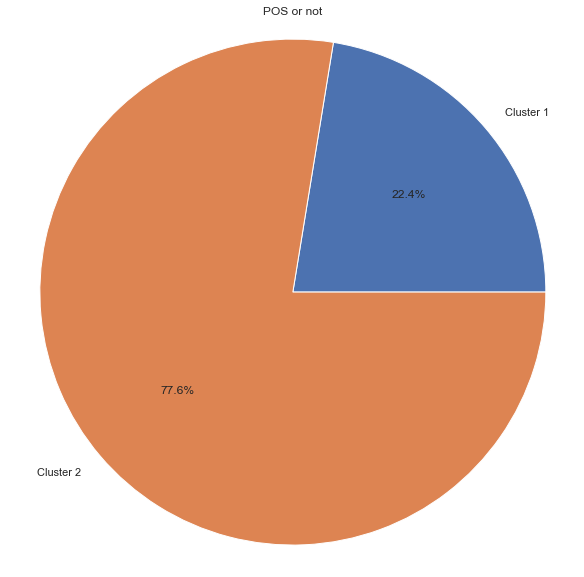

In [272]:
explode = [0, 0]  
 
sizes = []
names = []
n = 0
for c in [ten[7], ten[8]]:
    sizes.append(c.loc['mean']['NAME_PORTFOLIO_POS'])
    names.append('Cluster {n}'.format(n=n + 1))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('POS or not')
plt.show()

### Calculate differences between clusters 4 and 5

In [273]:
np.where(((abs(abs(ten[3].loc['mean'].values) - abs(ten[4].loc['mean'].values)) / 100) > 0.005) == True)

(array([ 71,  87, 278, 291, 292, 293, 294, 296, 297, 332, 333, 360, 389,
        393, 395, 403, 416, 456, 471], dtype=int64),)

In [280]:
ten_clusters[3].columns.values[393]

'DAYS_LAST_DUE'

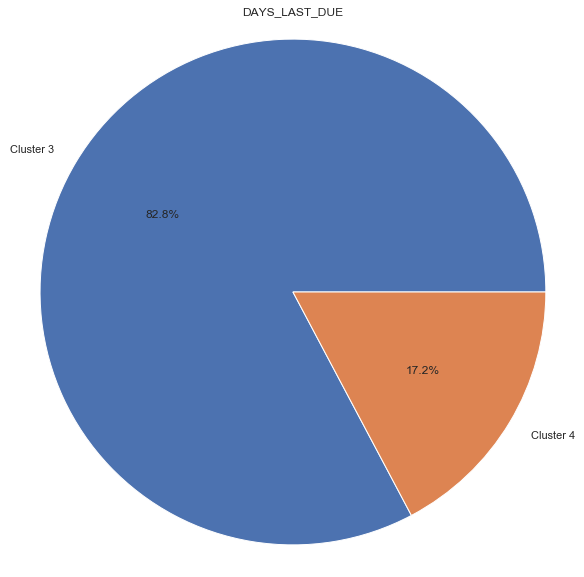

In [282]:
explode = [0, 0]  
 
sizes = []
names = []
n = 0
for c in [ten[3], ten[4]]:
    sizes.append(c.loc['mean']['DAYS_LAST_DUE'])
    names.append('Cluster {n}'.format(n=n + 3))
    n = n + 1
    
plt.figure(figsize=[10, 10])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('DAYS_LAST_DUE')
plt.show()

### Calculate problems with credits

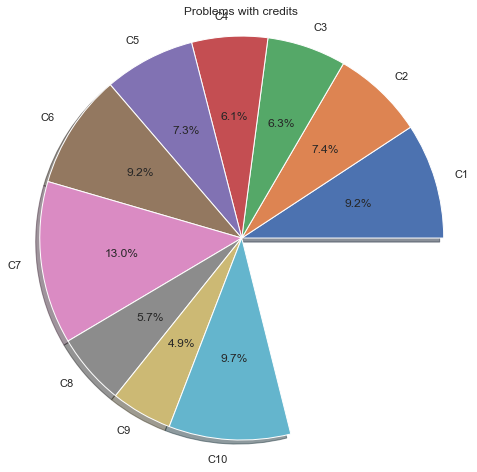

In [309]:
sizes = [ten_cluster_1['TARGET'].sum() / ten_cluster_1['TARGET'].count(), 
         ten_cluster_2['TARGET'].sum() / ten_cluster_2['TARGET'].count(),
         ten_cluster_3['TARGET'].sum() / ten_cluster_3['TARGET'].count(), 
         ten_cluster_4['TARGET'].sum() / ten_cluster_4['TARGET'].count(),
         ten_cluster_5['TARGET'].sum() / ten_cluster_5['TARGET'].count(),
         ten_cluster_6['TARGET'].sum() / ten_cluster_6['TARGET'].count(), 
         ten_cluster_7['TARGET'].sum() / ten_cluster_7['TARGET'].count(),
         ten_cluster_8['TARGET'].sum() / ten_cluster_8['TARGET'].count(), 
         ten_cluster_9['TARGET'].sum() / ten_cluster_9['TARGET'].count(),
         ten_cluster_10['TARGET'].sum()/ ten_cluster_10['TARGET'].count()]
explode = (0, 0, 0, 0, 0,
           0, 0, 0, 0, 0)  
names = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
plt.figure(figsize=[8, 8])
plt.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  
plt.title('Problems with credits')
plt.show()

# Выводы

## Из анализа выше следует отметить:

## Кластеры 1, 2, 3 - это клиенты среднего класса, образованые, есть много молодых клиентов. Небольшые проблемы с возвратом кредитов. 
## 4) Кластер 4 - это клиенты класса выше среднего, образованые, состоятельные, НЕ молодые и с большими апетитами на кредиты. Доля проблем с возвратом кредита относительно низкая. БОЛЬШОЕ количество дней после подачи предыдущей заявки до начала текущей. 
## 5) Кластер 5 - это клиенты класса выше среднего, образованые, состоятельные, ОТНОСИТЕЛЬНО молодые и с большими апетитами на кредиты. Доля проблем с возвратом кредита относительно низкая. МАЛОЕ количество дней после подачи предыдущей заявки до начала текущей.
## 8) Кластер 8 - это клиенты приклонного возраста, с очень низкими доходами, одиноки и слабообразованые. Уровень проблем с возвратом кредита - очень низкий. МАЛО клиентов с предыдущими платежами POS.
## 9) Кластер 9 - это клиенты приклонного возраста, с очень низкими доходами, одиноки и слабообразованые. Уровень проблем с возвратом кредита - очень низкий. МНОГО клиентов с предыдущими платежами POS.
## Кластеры 10, 7, 6 - это клиенты класса ниже среднего, но есть много клентов молодого возраста в кластере 6, возможно начинающие работники, поэтому и не сильно состоятельные. Уровень проблем с возвратом кредита - средний. Кластер 7 - имеет доход выше чем 10, и в кластере 10 очень много клиентов женского пола. Кластер 6 - представляет собой усредненные значения двух близкив кластеров - 7 и 10. Есть значительные проблемы с возвратом кредитов, особенно в кластере 7.





## В анализе на 10 кластеров нет сильной нужды, многое что описывается анализом на 5 , а то и 4 кластера. Поскольку такое количество кластеров - 10 - начинает слишком проседать в точности.